In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
%pylab inline
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier

Populating the interactive namespace from numpy and matplotlib


In [2]:

def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train['Sex_binario'] = train['Sex'].map(transformar_sexo)
test['Sex_binario'] = test['Sex'].map(transformar_sexo)

variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

X = train[variaveis].fillna(-1)
y = train['Survived']

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    print("Treino:", linhas_treino.shape[0])
    print("Valid:", linhas_valid.shape[0])

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acc:", acc)
    print()
    #print(X_treino.head())
    #print()

Treino: 445
Valid: 446
Acc: 0.7869955156950673

Treino: 446
Valid: 445
Acc: 0.7797752808988764

Treino: 445
Valid: 446
Acc: 0.827354260089686

Treino: 446
Valid: 445
Acc: 0.8179775280898877

Treino: 445
Valid: 446
Acc: 0.7847533632286996

Treino: 446
Valid: 445
Acc: 0.7842696629213484

Treino: 445
Valid: 446
Acc: 0.8161434977578476

Treino: 446
Valid: 445
Acc: 0.7842696629213484

Treino: 445
Valid: 446
Acc: 0.8004484304932735

Treino: 446
Valid: 445
Acc: 0.8

Treino: 445
Valid: 446
Acc: 0.8183856502242153

Treino: 446
Valid: 445
Acc: 0.802247191011236

Treino: 445
Valid: 446
Acc: 0.8116591928251121

Treino: 446
Valid: 445
Acc: 0.8067415730337079

Treino: 445
Valid: 446
Acc: 0.820627802690583

Treino: 446
Valid: 445
Acc: 0.7887640449438202

Treino: 445
Valid: 446
Acc: 0.8385650224215246

Treino: 446
Valid: 445
Acc: 0.8044943820224719

Treino: 445
Valid: 446
Acc: 0.7982062780269058

Treino: 446
Valid: 445
Acc: 0.8112359550561797



In [6]:

X_valid_check = train.iloc[linhas_valid].copy()
X_valid_check['p'] = p
X_valid_check.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [7]:
X_valid_check.shape

(445, 14)

In [8]:
erros = X_valid_check[X_valid_check['Survived'] != X_valid_check['p']]
erros = erros[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_binario', 'p', 'Survived']]
erros.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1
21,22,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,0,0,1
22,23,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,1,0,1
23,24,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,0,0,1
25,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,1,0,1


In [9]:
mulheres = erros[erros['Sex'] == 'female']
homens = erros[erros['Sex'] == 'male']

In [10]:
mulheres.sort_values("Survived")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,1,0
501,502,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q,1,1,0
498,499,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,1,1,0
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,1,1,0
474,475,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S,1,1,0
419,420,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S,1,1,0
357,358,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,NaN,S,1,1,0
254,255,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S,1,1,0
503,504,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S,1,1,0
654,655,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q,1,1,0


In [11]:
homens.sort_values("Survived")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
238,239,2,"Pengelly, Mr. Frederick William",male,19.00,0,0,28665,10.5000,NaN,S,0,1,0
442,443,3,"Petterson, Mr. Johan Emil",male,25.00,1,0,347076,7.7750,NaN,S,0,1,0
422,423,3,"Zimmerman, Mr. Leo",male,29.00,0,0,315082,7.8750,NaN,S,0,1,0
373,374,1,"Ringhini, Mr. Sante",male,22.00,0,0,PC 17760,135.6333,NaN,C,0,1,0
371,372,3,"Wiklund, Mr. Jakob Alfred",male,18.00,1,0,3101267,6.4958,NaN,S,0,1,0
698,699,1,"Thayer, Mr. John Borland",male,49.00,1,1,17421,110.8833,C68,C,0,1,0
262,263,1,"Taussig, Mr. Emil",male,52.00,1,1,110413,79.6500,E67,S,0,1,0
231,232,3,"Larsson, Mr. Bengt Edvin",male,29.00,0,0,347067,7.7750,NaN,S,0,1,0
214,215,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q,0,1,0
721,722,3,"Jensen, Mr. Svend Lauritz",male,17.00,1,0,350048,7.0542,NaN,S,0,1,0


In [12]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
#train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)

train['Cabine_nula'] = train['Cabin'].isnull().astype(int)

train['Nome_contem_Miss'] = train['Name'].str.contains("Miss").astype(int)
train['Nome_contem_Mrs'] = train['Name'].str.contains("Mrs").astype(int)

train['Nome_contem_Master'] = train['Name'].str.contains("Master").astype(int)
train['Nome_contem_Col'] = train['Name'].str.contains("Col").astype(int)
train['Nome_contem_Major'] = train['Name'].str.contains("Major").astype(int)
train['Nome_contem_Mr'] = train['Name'].str.contains("Mr").astype(int)

In [13]:
variaveis

['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [14]:
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_C', 'Cabine_nula',
             'Nome_contem_Miss', 'Nome_contem_Mrs',
             'Nome_contem_Master', 'Nome_contem_Col', 'Nome_contem_Major', 'Nome_contem_Mr']

X = train[variaveis].fillna(-1)
y = train['Survived']

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
resultados2 = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    print("Treino:", linhas_treino.shape[0])
    print("Valid:", linhas_valid.shape[0])

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    #modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo = LogisticRegression()
    
    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados2.append(acc)
    print("Acc:", acc)
    print()
    #print(X_treino.head())
    #print()

Treino: 445
Valid: 446
Acc: 0.8318385650224215

Treino: 446
Valid: 445
Acc: 0.8067415730337079

Treino: 445
Valid: 446


C:\Users\julio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\julio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Acc: 0.8183856502242153

Treino: 446
Valid: 445
Acc: 0.802247191011236

Treino: 445
Valid: 446
Acc: 0.8161434977578476

Treino: 446
Valid: 445


C:\Users\julio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\julio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Acc: 0.8157303370786517

Treino: 445
Valid: 446
Acc: 0.8183856502242153

Treino: 446
Valid: 445
Acc: 0.8089887640449438

Treino: 445
Valid: 446
Acc: 0.8183856502242153



C:\Users\julio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\julio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Treino: 446
Valid: 445
Acc: 0.8157303370786517

Treino: 445
Valid: 446
Acc: 0.8251121076233184

Treino: 446
Valid: 445
Acc: 0.8179775280898877

Treino: 445
Valid: 446
Acc: 0.8408071748878924

Treino: 446
Valid: 445


C:\Users\julio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\julio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Acc: 0.8

Treino: 445
Valid: 446
Acc: 0.804932735426009

Treino: 446
Valid: 445
Acc: 0.802247191011236

Treino: 445
Valid: 446
Acc: 0.8385650224215246

Treino: 446
Valid: 445
Acc: 0.8157303370786517

Treino: 445
Valid: 446
Acc: 0.8363228699551569

Treino: 446
Valid: 445
Acc: 0.8269662921348314



C:\Users\julio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\julio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

((array([3., 2., 1., 4., 4., 0., 2., 1., 1., 2.]),
  array([0.8       , 0.80408072, 0.80816143, 0.81224215, 0.81632287,
         0.82040359, 0.8244843 , 0.82856502, 0.83264574, 0.83672646,
         0.84080717]),
  <BarContainer object of 10 artists>),
 (array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
  array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
         0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
         0.83856502]),
  <BarContainer object of 10 artists>))

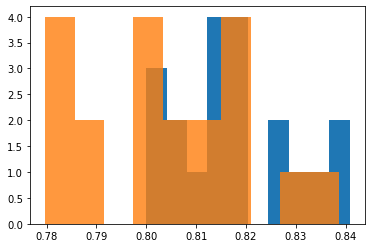

In [17]:
pylab.hist(resultados2), pylab.hist(resultados,alpha=0.8)

In [18]:

np.mean(resultados2)

0.8180619237164308

In [19]:
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)
#test['Embarked_Q'] = (test['Embarked'] == 'Q').astype(int)

test['Cabine_nula'] = (test['Cabin'].isnull()).astype(int)

test['Nome_contem_Miss'] = test['Name'].str.contains("Miss").astype(int)
test['Nome_contem_Mrs'] = test['Name'].str.contains("Mrs").astype(int)

test['Nome_contem_Master'] = test['Name'].str.contains("Master").astype(int)
test['Nome_contem_Col'] = test['Name'].str.contains("Col").astype(int)
test['Nome_contem_Major'] = test['Name'].str.contains("Major").astype(int)
test['Nome_contem_Mr'] = test['Name'].str.contains("Mr").astype(int)

modelo = LogisticRegression()
modelo.fit(X, y)

p = modelo.predict(test[variaveis].fillna(-1))

C:\Users\julio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub.shape

(418,)

In [21]:
sub.to_csv("modelo_titanic.csv", header=True)